In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
df=pd.read_csv("Salaries.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [5]:
df.columns = ['rank','discipline','yrs.since.phd','yrs.service','sex','salary']

In [6]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [7]:
df.shape

(397, 6)

In [8]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [78]:
#df['salary'].unique()

In [10]:
%matplotlib inline

G:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='yrs.since.phd'>

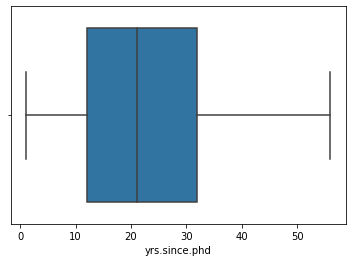

In [11]:
sns.boxplot(df['yrs.since.phd'])

In [12]:
df=df.drop("sex",axis=1)

In [13]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,salary
0,Prof,B,19,18,139750
1,Prof,B,20,16,173200
2,AsstProf,B,4,3,79750
3,Prof,B,45,39,115000
4,Prof,B,40,41,141500


In [14]:
df['discipline'].unique()

array(['B', 'A'], dtype=object)

In [15]:
df['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [16]:
def feature_engineering(df):
    label_enco_rank = {value:key for key,value in enumerate(df["rank"].unique())}
    df["rank"] = df["rank"].map(label_enco_rank)
    
    label_enco_discipline = {value:key for key,value in enumerate(df["discipline"].unique())}
    df["discipline"] = df["discipline"].map(label_enco_discipline)
    return df

In [17]:
df = feature_engineering(df)

In [18]:
df.head()

,rank,discipline,yrs.since.phd,yrs.service,salary
0,0,0,19,18,139750
1,0,0,20,16,173200
2,1,0,4,3,79750
3,0,0,45,39,115000
4,0,0,40,41,141500


In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
X = df[['rank','discipline','yrs.since.phd','yrs.service']]

In [22]:
y = df['salary']

In [23]:
y.value_counts()

92000     5
72500     4
74000     4
105000    3
101000    3
         ..
76840     1
83001     1
113278    1
155500    1
81035     1
Name: salary, Length: 371, dtype: int64

In [24]:
X = sc.fit_transform(X)

In [25]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = (train_test_split(X,y,test_size=0.2,random_state=40))

In [67]:
print('Train data shape: {}'.format(X_train.shape))
print('Test data shape: {}'.format(X_test.shape))


Train data shape: (317, 4)
Test data shape: (80, 4)


In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
lg_model = LogisticRegression()

In [70]:
lg_model.fit(X_train,y_train)

LogisticRegression()

In [71]:
y_pred = lg_model.predict(X_test)

In [72]:
result = {'Actual' : y_test, 'Predicted' : y_pred}

In [73]:
pd.DataFrame(result)

,Actual,Predicted
142,106608,105000
135,136000,105000
77,193000,101000
246,91100,105000
118,72500,72500
...,...,...
197,92000,92000
323,161101,101000
372,109707,72500
286,115800,105000


In [76]:
from sklearn.metrics import  accuracy_score

In [77]:
print("Accuracy Score: {}".format(accuracy_score(y_test,y_pred)))

Accuracy Score: 0.05
